In [2]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Вопрос 1

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [3]:
water = pd.read_csv('water.txt', delimiter='\t')
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [5]:
water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


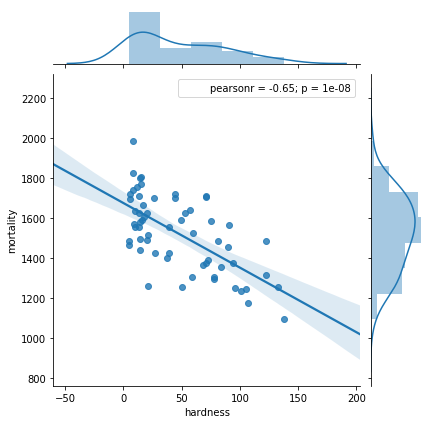

In [8]:
sns.jointplot('hardness', 'mortality', water, kind="reg");

In [6]:
water_pearsonr  = stats.pearsonr(water['hardness'], water['mortality'])
print("Pearson correlation: %.4f" % water_pearsonr [0])

Pearson correlation: -0.6548


### Вопрос 2

В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [10]:
water_spearmanr = stats.spearmanr(water['hardness'], water['mortality'])
print('Spearman correlation: %.4f' % water_spearmanr[0])

Spearman correlation: -0.6317


### Вопрос 3

Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [12]:
water_north = water[water['location'] == 'North'].copy()
water_south = water[water['location'] == 'South'].copy()

In [16]:
print(water_north.shape)
print(water_south.shape)

(35, 4)
(26, 4)


In [17]:
water_north_pearsonr  = stats.pearsonr(water_north['hardness'], water_north['mortality'])
print("North Pearson correlation: %.4f" % water_north_pearsonr [0])

Pearson correlation: -0.3686


In [18]:
water_south_pearsonr  = stats.pearsonr(water_south['hardness'], water_south['mortality'])
print("South Pearson correlation: %.4f" % water_south_pearsonr [0])

South Pearson correlation: -0.6022


### Вопрос 4

Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [21]:
gss_bars = np.array([[203., 239.], [718., 515.]])

In [22]:
def matthews_corrcoef(a, b, c, d):
    return (a*d - b*c) / np.sqrt((a + b)*(a + c)*(b + d)*(c + d))

In [25]:
matthews = matthews_corrcoef(*gss_bars.flatten())
print('Matthews correlation: %.4f' % matthews)

Matthews correlation: -0.1090


### Вопрос 5

В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [29]:
chi2, p, dof, ex = stats.chi2_contingency(gss_bars)
print('Matthews significance p-value: %f' % p)

Matthews significance p-value: 0.000011


### Вопрос 6

В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [33]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [36]:
gss_bars

array([[203., 239.],
       [718., 515.]])

In [42]:
gss_bars_women = np.array([1 if i < 203 else 0 for i in range(203+718)])
gss_bars_men = np.array([1 if i < 239 else 0 for i in range(239+515)])

In [43]:
print('95%% confidence interval for a difference of men and women: [%.4f, %.4f]' %
      proportions_diff_confint_ind(gss_bars_women, gss_bars_men))

95% confidence interval for a difference of men and women: [-0.1392, -0.0539]


### Вопрос 7

Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести 8).



In [45]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [53]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [57]:
print('p-value: %.8f' % proportions_diff_z_test(proportions_diff_z_stat_ind(gss_bars_women, gss_bars_men)))

p-value: 0.00000815


### Вопрос 8

Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

In [59]:
happiness = np.array([[197., 111., 33. ],
                      [382., 685., 331.],
                      [110., 342., 333.]])

In [62]:
stats.chi2_contingency(happiness)

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

In [61]:
print('Chi2 stat value: %.4f' % stats.chi2_contingency(happiness)[0])

Chi2 stat value: 293.6831


### Вопрос 9

На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [66]:
print('Chi2 stat p-value: %.62f' % stats.chi2_contingency(happiness)[1])

Chi2 stat p-value: 0.00000000000000000000000000000000000000000000000000000000000002


### Вопрос 10

Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [68]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [69]:
print('V Cramer stat value: %.4f' % cramers_stat(happiness))

V Cramer stat value: 0.2412
